# Zadanie IV

### Instalacja bibliotek

In [ ]:
conda install numpy

In [ ]:
conda install matplotlib

In [ ]:
conda install pandas

In [ ]:
conda install scikit-learn

In [ ]:
conda install seaborn

### Importowanie

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
from sklearn import model_selection

In [9]:
import seaborn as sb

In [10]:
from sklearn import linear_model

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn import metrics

In [13]:
from sklearn.preprocessing import PolynomialFeatures

### 1.

In [14]:
zad = pd.read_csv('https://www.fizyka.umk.pl/~grochu/wdm/files/diabetes.csv')

In [15]:
zad.isnull().values.any()

False

In [16]:
zad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


### 2.

In [17]:
zad_train, zad_test = model_selection.train_test_split(zad, test_size=0.25, shuffle=False)

In [18]:
zad_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 330
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     331 non-null    int64  
 1   SEX     331 non-null    int64  
 2   BMI     331 non-null    float64
 3   BP      331 non-null    float64
 4   S1      331 non-null    int64  
 5   S2      331 non-null    float64
 6   S3      331 non-null    float64
 7   S4      331 non-null    float64
 8   S5      331 non-null    float64
 9   S6      331 non-null    int64  
 10  Y       331 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 31.0 KB


### 3.

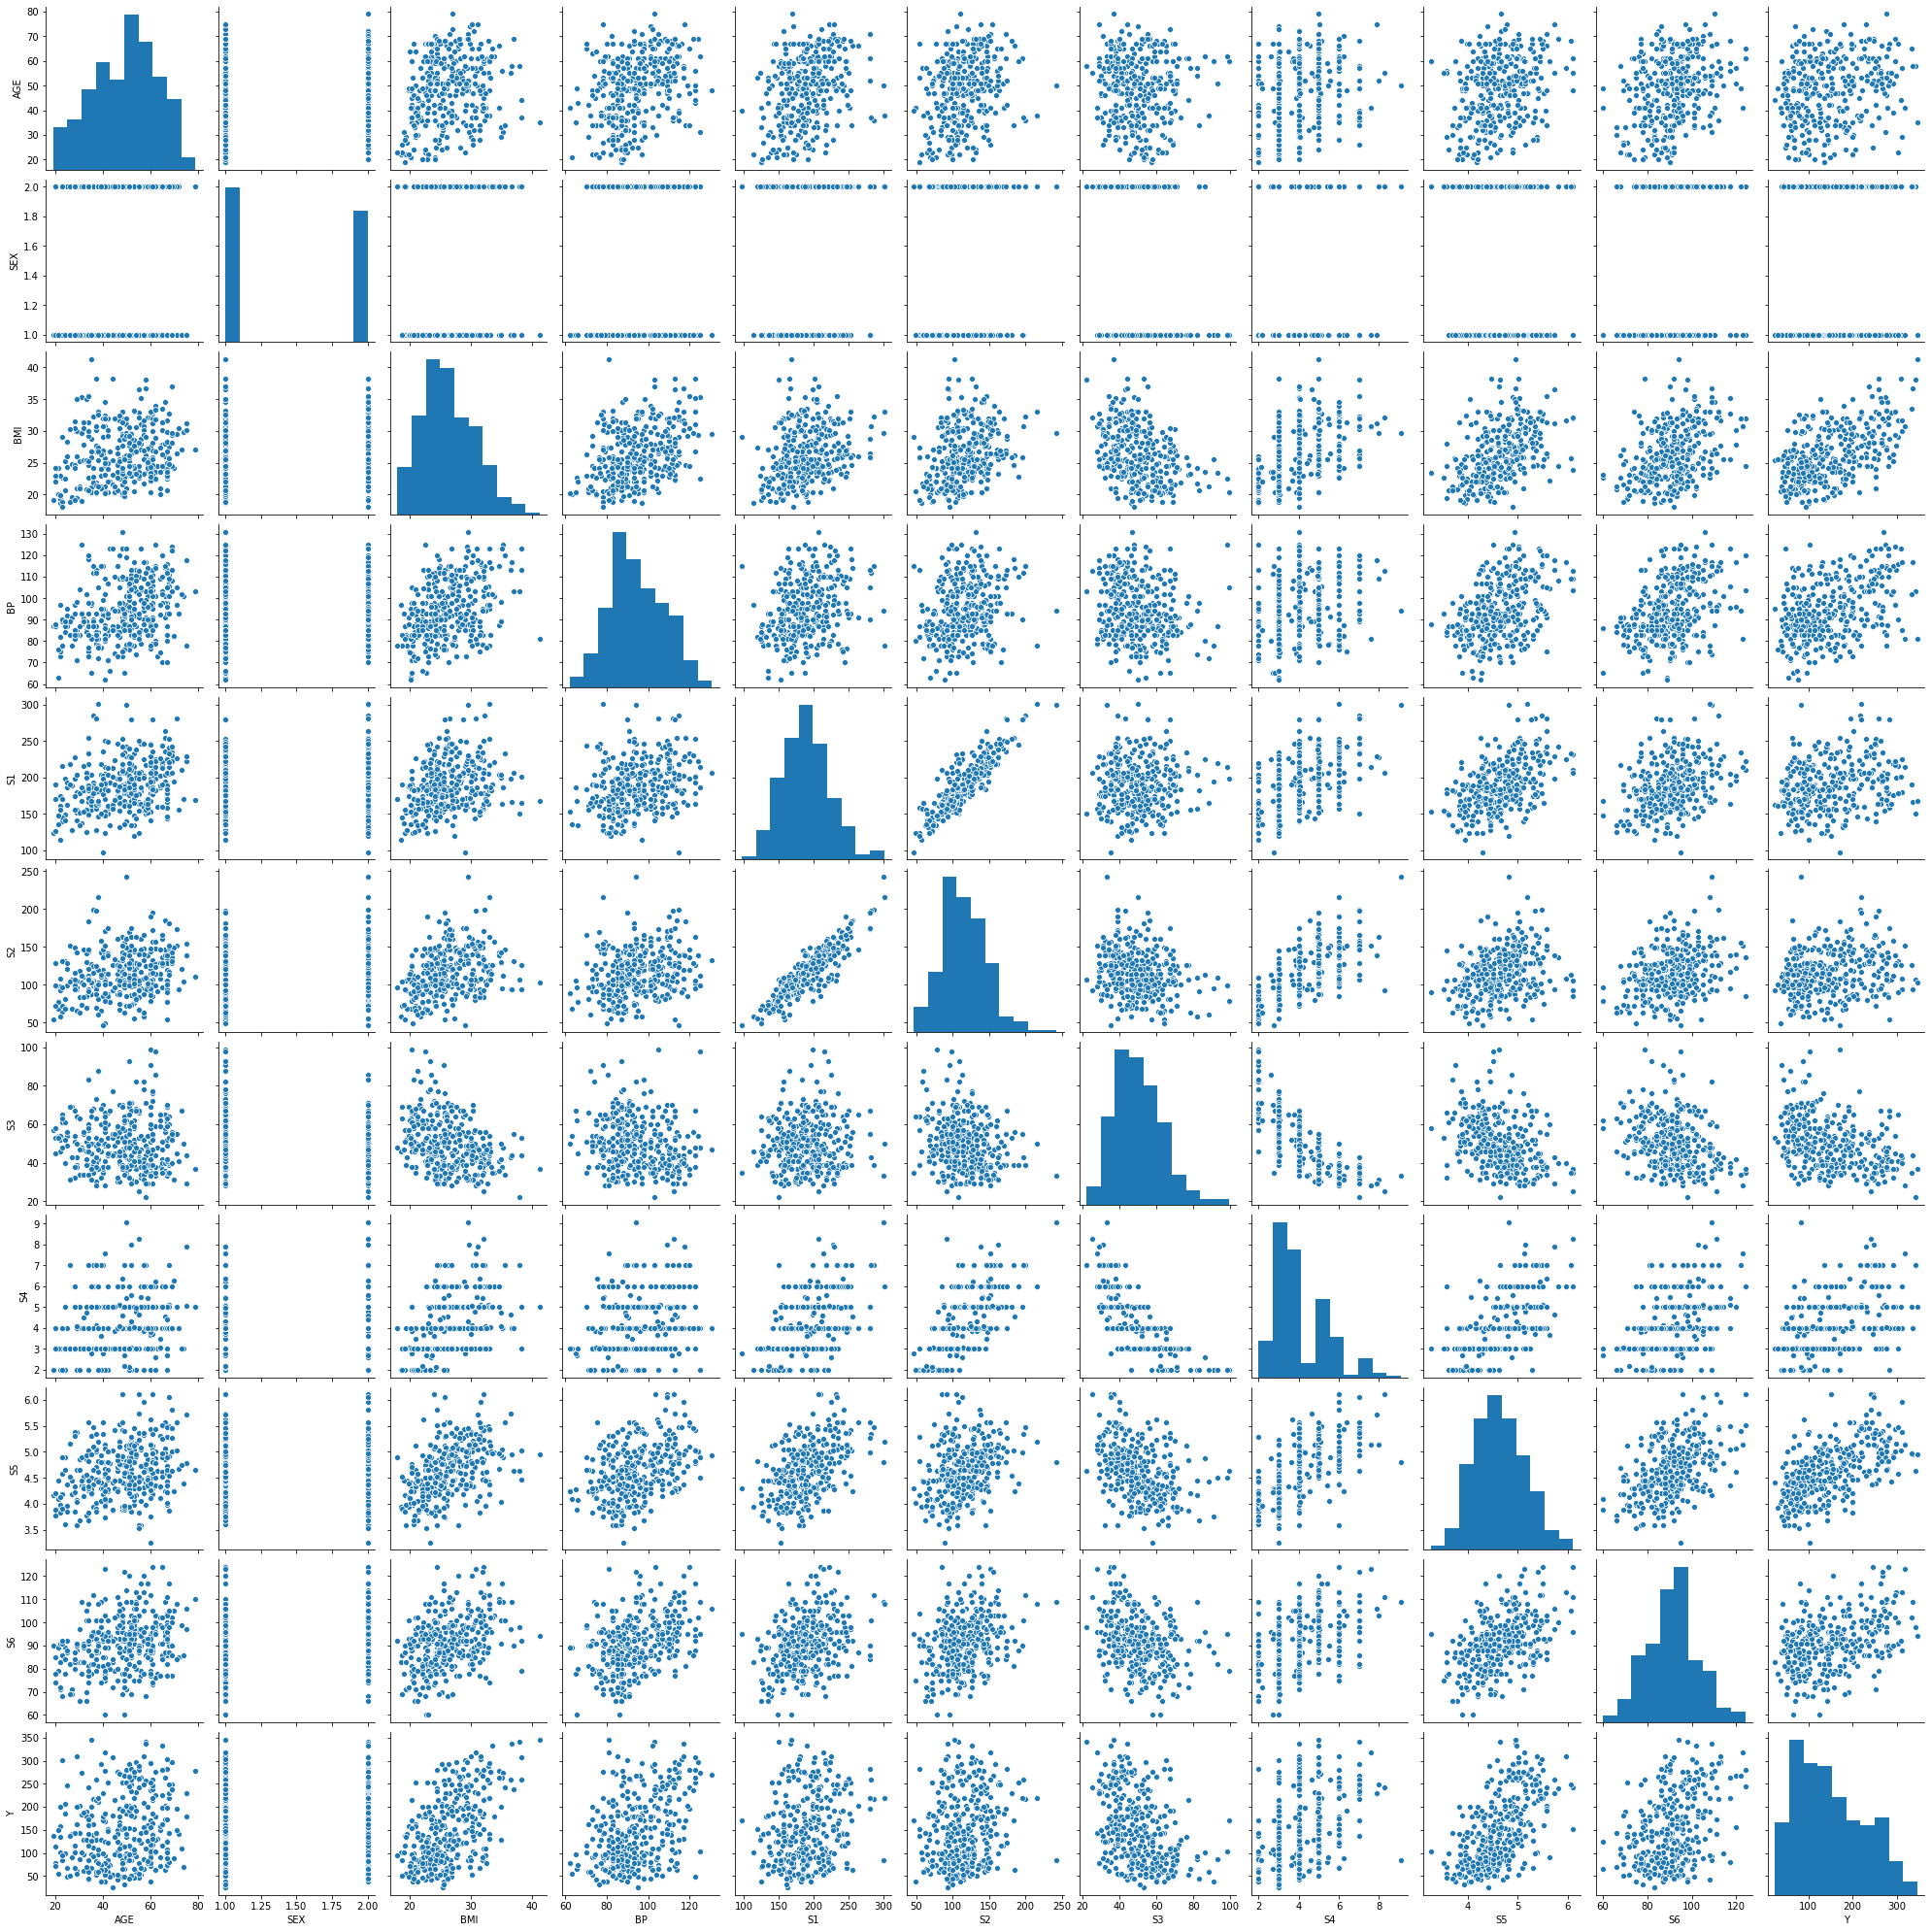

In [19]:
sb.pairplot(zad_train)

In [20]:
regr = linear_model.LinearRegression()

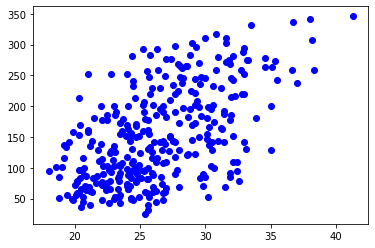

In [21]:
plt.plot(zad_train['BMI'], zad_train['Y'], 'bo')

In [22]:
x = zad_train['BMI'].values
y = zad_train['Y'].values
x = x.reshape(331,1)
y = y.reshape(331,1)
regr.fit(x,y)

LinearRegression()

In [23]:
print("f(x) = %f x + %f" % (regr.coef_[0],regr.intercept_))

f(x) = 10.147224 x + -116.148822


### MSE

In [24]:
y_pred = regr.predict(x)

data = ['Linear Regression train', metrics.mean_squared_error(y, y_pred)]
data

['Linear Regression train', 3955.532108237149]

In [25]:
x_test = zad_test['BMI'].values
x_test = x_test.reshape(111,1)
y_test = zad_test['Y'].values
y_test = y_test.reshape(111,1)

In [26]:
y_test_pred = regr.predict(x_test)

In [27]:
data2 = ['Linear Regression test', metrics.mean_squared_error(y_test, y_test_pred)]
data2

['Linear Regression test', 3698.612229796081]

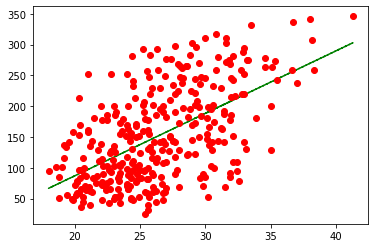

In [28]:
plt.plot(x, y_pred, 'g--')
plt.plot(x, y, 'ro')
plt.show()

### 4.

In [36]:
test1 = zad_train[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
test1

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
326,61,2,25.6,85.0,184,116.2,39.0,5.0,4.9698,98
327,69,1,37.0,103.0,207,131.4,55.0,4.0,4.6347,90
328,38,1,32.6,77.0,168,100.6,47.0,4.0,4.6250,96
329,45,2,21.2,94.0,169,96.8,55.0,3.0,4.4543,102


In [37]:
test1_test = zad_test[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
test1_test

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
331,71,2,24.0,84.00,138,85.8,39.0,4.00,4.1897,90
332,57,1,36.1,117.00,181,108.2,34.0,5.00,5.2679,100
333,56,2,25.8,103.00,177,114.4,34.0,5.00,4.9628,99
334,32,2,22.0,88.00,137,78.6,48.0,3.00,3.9512,78
335,50,1,21.9,91.00,190,111.2,67.0,3.00,4.0775,77
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


### Alpha =0.01

In [44]:
lasso001 = linear_model.Lasso(alpha=0.01)
lasso001.fit(test1, y)

Lasso(alpha=0.01)

In [45]:
y_lasso001_pred_train = lasso001.predict(test1)
y_lasso001_pred_test = lasso001.predict(test1_test)

print('Train: %f' % metrics.mean_squared_error(y, y_lasso001_pred_train))
print('Test: %f' % metrics.mean_squared_error(y_test, y_lasso001_pred_test))

Train: 2898.942834
Test: 2775.696191


### Alpha =0.1

In [46]:
lasso01 = linear_model.Lasso(alpha=0.1)
lasso01.fit(test1, y)

Lasso(alpha=0.1)

In [47]:
y_lasso01_pred_train = lasso01.predict(test1)
y_lasso01_pred_test = lasso01.predict(test1_test)

print('Train: %f' % metrics.mean_squared_error(y, y_lasso01_pred_train))
print('Test: %f' % metrics.mean_squared_error(y_test, y_lasso01_pred_test))

Train: 2899.454132
Test: 2784.499771


### Alpha =0.25

In [48]:
lasso025 = linear_model.Lasso(alpha=0.25)
lasso025.fit(test1, y)

Lasso(alpha=0.25)

In [49]:
y_lasso025_pred_train = lasso025.predict(test1)
y_lasso025_pred_test = lasso025.predict(test1_test)

print('Train: %f' % metrics.mean_squared_error(y, y_lasso025_pred_train))
print('Test: %f' % metrics.mean_squared_error(y_test, y_lasso025_pred_test))

Train: 2902.165022
Test: 2801.099376


### Alpha =0.75

In [50]:
lasso075 = linear_model.Lasso(alpha=0.75)
lasso075.fit(test1, y)

Lasso(alpha=0.75)

In [51]:
y_lasso075_pred_train = lasso075.predict(test1)
y_lasso075_pred_test = lasso075.predict(test1_test)

print('Train: %f' % metrics.mean_squared_error(y, y_lasso075_pred_train))
print('Test: %f' % metrics.mean_squared_error(y_test, y_lasso075_pred_test))

Train: 2921.759029
Test: 2854.230172


### Najlepszy wynik na danych testowych daje ustawienie alpha=0.01

### 5.

Analizując wyniki, można stwierdzić że najlepiej dla danych testowych, spośród testowanych regresji, wychodzi regresja liniowa wielowymiarowa z regularyzacją Lasso dla alpha=0.01 o podanych poniżej współczynnikach.

In [53]:
print('Train: %f' % metrics.mean_squared_error(y, y_lasso001_pred_train))
print('Test: %f' % metrics.mean_squared_error(y_test, y_lasso001_pred_test))

Train: 2898.942834
Test: 2775.696191


In [52]:
print(lasso001.coef_)
print(lasso001.intercept_)

[-4.30444174e-02 -2.26837437e+01  5.44990618e+00  1.02913111e+00
 -6.36007542e-01  3.24068192e-01 -1.16036544e-01  4.76167822e+00
  5.95754459e+01  4.10834769e-01]
[-298.98984958]
